---
title: "Dimensionality Reduction"
execute:
  echo: false
format:
  html:
    page-layout: full
    code-tools: false
---

# Overview

Dimensionality reduction plays an essential role in data analysis, particularly when handling datasets with a high number of dimensions. Our focus will be on applying dimensionality reduction techniques, specifically PCA and t-SNE, to analyze our dataset on uninsured individuals before and after the implementation of the ACA law. These techniques are instrumental in distilling complex data into a more manageable form, preserving critical information while enhancing the efficiency of visualization, processing, and interpretation. We will employ Principal Component Analysis (PCA) for its effectiveness in linear dimensionality reduction and t-Distributed Stochastic Neighbor Embedding (t-SNE) for its ability to capture non-linear relationships, thereby providing a comprehensive view of our dataset's underlying structure.

## Dimensionality Reduction with PCA

Principal Component Analysis (PCA) serves as a linear method aimed at diminishing the dimensions of data while preserving the maximum possible variance. This technique remodels the original variables into a new set termed as principal components. These components are orthogonal, meaning they are uncorrelated, and they effectively encapsulate the utmost variance present in the data. In this hierarchy, the first principal component is responsible for the highest variance, followed by the second principal component, which is orthogonal to the first, capturing the subsequent highest variance, and this pattern continues. PCA finds its utility in various applications, including exploratory data analysis, reducing noise, extracting key features, and compressing data. In the Python programming environment, PCA can be efficiently executed using libraries like scikit-learn.

**PCA Reduced Dimensionality Visualization**

In [35]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

data = pd.read_csv("cleaned_data/cleaned_states.csv")

df = pd.DataFrame(data)

first_column = df.columns[0]
df = df.drop(first_column, axis=1)

df = df.dropna()
#print(df)

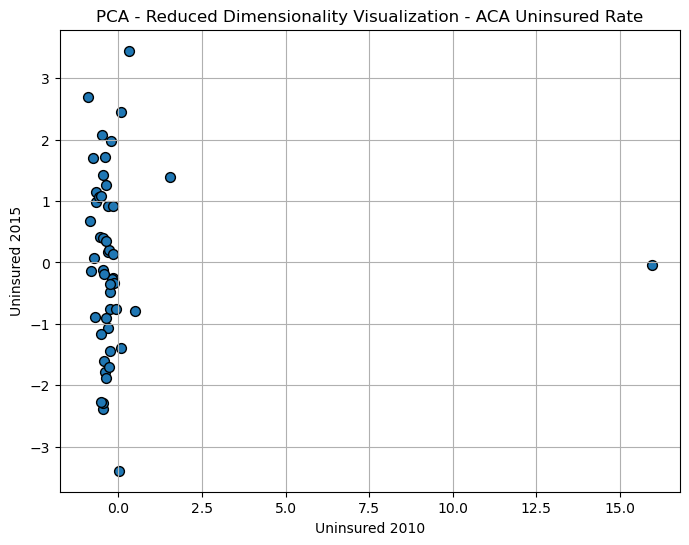

In [40]:
#prep for PCA
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)

#apply PCA
pca = PCA(n_components=2)
principal_components = pca.fit_transform(df_scaled)


#determine the optimal number of principal components to retain
explained_variance = pca.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance)


#plot
plt.figure(figsize=(8, 6))
plt.scatter(principal_components[:, 0], principal_components[:, 1], edgecolor='k', s=50)
plt.xlabel('Uninsured 2010')
plt.ylabel('Uninsured 2015')
plt.title('PCA - Reduced Dimensionality Visualization - ACA Uninsured Rate')
plt.grid()

Utilizing Principal Component Analysis (PCA) as a method of dimensionality reduction, the given plot successfully compresses multi-year data into a two-dimensional format, enhancing its visual interpretability. This visualization facilitates the detection of underlying patterns, particularly the potential trend in the reduction of uninsured rates between 2010 and 2015.

The concentration of data points towards the left side of the plot indicates a relatively modest variance captured by the first principal component concerning uninsured rates in 2010. In contrast, the more extensive distribution along the 'Uninsured 2015' axis suggests that there were more substantial changes in uninsured rates following the Affordable Care Act (ACA) implementation. The presence of a distinct outlier on the plot's right side is noteworthy. This particular data point, significantly distanced from the rest, might signify either an exceptionally high uninsured rate in 2010 or a remarkable decrease by 2015, potentially reflecting a unique scenario in a specific state or region.

In summary, the plot reveals that, for the majority of the data points, there were variations in uninsured rates from 2010 to 2015, although the extent of these changes was generally moderate, as depicted by the data's clustered arrangement.

**PCA Components**

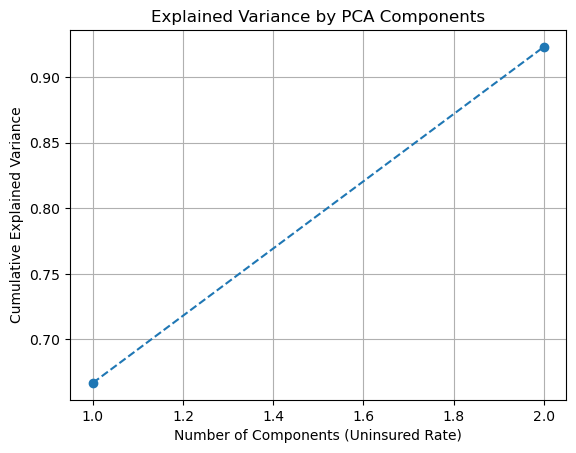

In [41]:
#plot
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o', linestyle='--')
plt.xlabel('Number of Components (Uninsured Rate)')
plt.ylabel('Cumulative Explained Variance')
plt.title('Explained Variance by PCA Components')
plt.grid()
plt.show()

**Number of Components** indicates the principal components derived from PCA. Here, it shows 1 and 2, which represent the first two principal components.


**Cumulative Explained Variance** represents the proportion of the dataset's total variance that is captured by the principal components. It's a cumulative sum, meaning each point on the plot adds the variance explained by the given component to the total explained by all previous components.

In [38]:
explained_variance, cumulative_variance

(array([0.66678308, 0.25621742]), array([0.66678308, 0.92300051]))

The initial principal component accounts for approximately 66.67% of the variance in the dataset concerning uninsured rates. Including the second principal component elevates the cumulative explained variance to roughly 92.30%. This indicates that these first two principal components collectively encapsulate a substantial portion of the information in the dataset, which spans uninsured rates across several years. Essentially, this means that these two dimensions can effectively represent the original multi-year data, thereby simplifying its complexity significantly.

Substantiating these insights, the PCA results displayed below the plot align with the visual interpretation. The individual explained variance by each principal component is indicated by the array [0.66678308, 0.25621742]. Concurrently, the cumulative array [0.66678308, 0.92300511] corroborates that, in unison, these components account for over 92% of the variance.

In terms of healthcare policy analysis, such as evaluating the Affordable Care Act (ACA)'s influence on uninsured rates, this PCA examination could be instrumental. For instance, if the primary principal component demonstrates a strong correlation with the uninsured rate post-ACA implementation, it might suggest a considerable impact of the ACA on these rates. However, a more thorough investigation, possibly involving an analysis of the principal components' loadings, would be required to derive concrete conclusions regarding the ACA's specific effects.

## Dimensionality Reduction with t-SNE

t-Distributed Stochastic Neighbor Embedding (t-SNE) is a sophisticated non-linear approach predominantly used for visualizing complex, high-dimensional datasets. This technique effectively translates the similarities among data points into joint probability values, aiming to reduce the divergence, specifically the Kullback-Leibler divergence, between these probabilities in both the original high-dimensional space and the new, lower-dimensional representation.

t-SNE excels in compressing data into two or three dimensions, making it ideal for scatter plot visualizations. Its strength lies in its ability to maintain the data's local structure and to highlight clusters or patterns within data points. However, t-SNE is known to be demanding in terms of computational resources and requires careful tuning of its hyperparameters. In Python, t-SNE is accessible via the scikit-learn library, offering a practical tool for data scientists to uncover hidden structures in complex datasets.

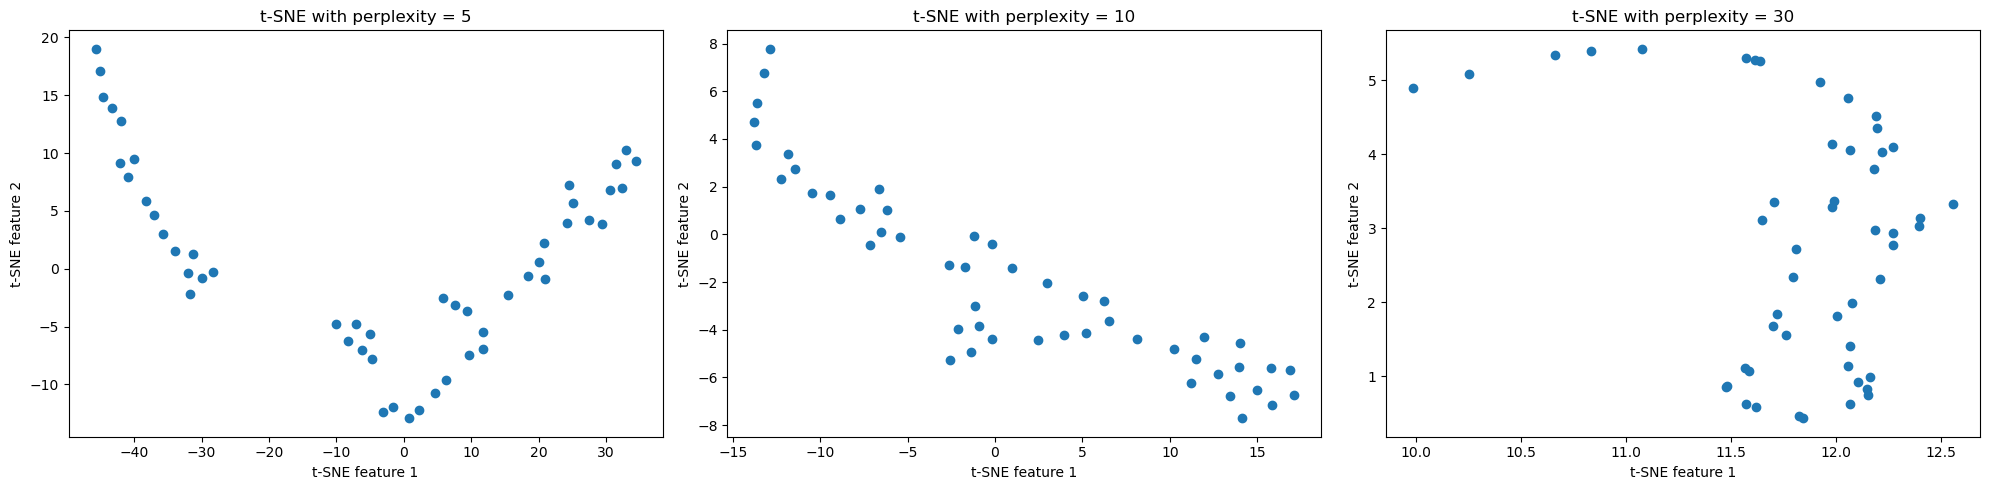

In [39]:
from sklearn.manifold import TSNE

perplexity_values = [5, 10, 30]

fig, axes = plt.subplots(1, len(perplexity_values), figsize=(20, 5))

for idx, perplexity in enumerate(perplexity_values):
    tsne = TSNE(n_components=2, perplexity=perplexity, random_state=42)
    tsne_results = tsne.fit_transform(df)

    axes[idx].scatter(tsne_results[:, 0], tsne_results[:, 1])
    axes[idx].set_title(f"t-SNE with perplexity = {perplexity}")
    axes[idx].set_xlabel("t-SNE feature 1")
    axes[idx].set_ylabel("t-SNE feature 2")

plt.tight_layout()
plt.show()

The provided image showcases three scatter plots derived from the application of t-Distributed Stochastic Neighbor Embedding (t-SNE) on a dataset. This technique, a popular method for reducing the dimensions of high-dimensional datasets, is illustrated with different perplexity values: 5, 10, and 30. Perplexity in t-SNE serves as a crucial hyperparameter, playing a pivotal role in balancing the algorithm's focus between local and global data structures. It essentially represents the effective number of neighbors considered in the analysis.

In the initial plot with a perplexity of 5, we observe a broad dispersion of data points. They cluster into an elongated shape with a distinct separation, indicating a stronger emphasis on local data characteristics. The next plot, with a perplexity of 10, exhibits a tighter cluster formation. This reflects a reduced focus on local outliers, suggesting a more balanced view between local and global data aspects. The final plot, at a perplexity of 30, displays an even more unified cluster. This implies that the algorithm is integrating local and global perspectives more effectively, considering a wider context of the dataset.

**Perplexity show the ACA effect uninsured rate in U.S**

Perplexity = 5: This visualization may represent distinct regions or states, with the apparent gap possibly illustrating a significant divergence in uninsured rates between two groups. The emphasis on local structures could be indicative of variations within these groups caused by the ACA's impact.

Perplexity = 10: At this level, the plot might be capturing a more nuanced effect of the ACA, striking a balance between local differences and overarching trends. This could reflect the ACA's varied impact on uninsured rates across different subgroups.

Perplexity = 30: This higher perplexity level suggests a more uniform landscape post-ACA. It implies that when considering a broader perspective, uninsured rates across various regions are more alike than different, showing a diminished distinction between clusters.

The evolving patterns in these plots hint at the ACA's impact on uninsured rates being significantly dependent on the scale of analysis. The increased integration at higher perplexity levels might suggest that the ACA has generally led to a more uniform landscape in uninsured rates. In contrast, lower perplexity levels reveal pronounced disparities, highlighting local variations.

## Conclusion

Upon evaluating both dimensionality reduction techniques, I recommend using t-SNE for this particular analysis. It offers more profound and insightful correlations between the Affordable Care Act (ACA) and the uninsured rate in the United States. Unlike PCA, t-SNE excels in uncovering complex, non-linear relationships and is more adept at revealing intricate patterns in the data, making it an ideal choice for exploring the nuanced connections within this context.